# Introduction

There is a good reason why the world’s forerunner-businesses are increasingly using Graph databases. This modern technology offers unprecedented agility, scalability, and performance for managing vast amounts of highly dynamic and exponentially growing data for various use-cases — this is precisely what today’s applications require. 

The Graph databases is adopted for ever more use-cases and applications as organizations continue implementing the Graph technology.


Purpose of this work show  to migrate content from a PostgreSQL database to a Neo4j 
database, and then retrieve specific components of that data from Neo4j via Neo4j’s Cypher query language. 


# PostgreSQL to Neo4j Migration 

## 1. Exporting required Postgres tables to CSV files. 



*   FOR TABLE ARTIST:


```
\copy "Artist" to 'Desktop\Yeshiva\Artist.csv' DELIMITER ',' CSV HEADER;
```


*  FOR TABLE ALBUM:


```
\copy "Album" to 'Desktop\Yeshiva\Album.csv' DELIMITER ',' CSV HEADER;
```

* FOR TABLE TRACK:


```
\copy "Track" to 'Desktop\Yeshiva\Track.csv' DELIMITER ',' CSV HEADER;
```

* FOR TABLE GENRE:


```
\copy "Genre" to 'Desktop\Yeshiva\Genre.csv' DELIMITER ',' CSV HEADER;
```

* FOR TABLE MediaType:


```
\copy "Genre" to 'Desktop\Yeshiva\MediaType.csv' DELIMITER ',' CSV HEADER;
```




## 2. Defining Graph Database Schema

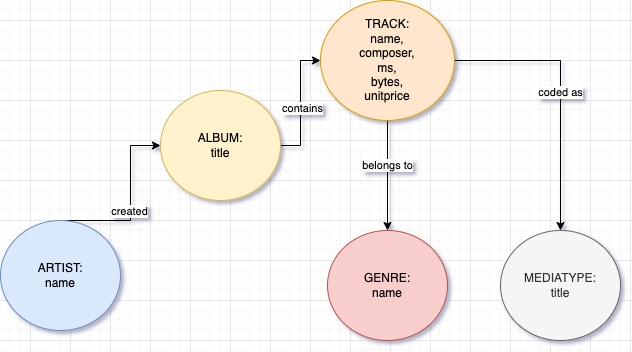

OUR GRAPH DATABASE CONTAINS THE NEXT NODES:
* TRACK with next properties: name (name of track), composer(creator of track), ms(duraation), unitprice (price).
* ALBUM  with next properties: title - name of album.
* ARTIST with next properties: name - artist name.
* GENRE  with next properties: name -  name of genre.

OUR GRAPH DATABASE CONTAINS THE NEXT EDGES:
* CREATED - from node ARTIST to node ALBUM- 'Artist created some album'.
* CONTAINS - from node ALBUM to node TRACK - 'Album contains some tracks'.
* BELONGS TO - from node TRACK to node GENRE - 'Track belongs to some genre'.
* CODED AS - form node TRACK to node MEDIATYPE - 'Track coded as some mediatype'







After review of Chinook RDBMS We should add the next constraints to our database:


*   TRACK belongs only to one GENRE
*   TRACK can be coded as only one MEDIATYPE
*   TRACK can be cotained in only one ALBUM
*   ALBUM can have only one ARTIST
*   We're adding the ID value to each node to make the node unique.



Each node will contain his unique id to make relationships that we had before. 

As the next stage within Neo4j Desktop we create a new project named AIM 5001.Within that Project we add a new 
“Local DBMS” named M13 Assignment. Then, start the M13 Assignment database from within our 
Neo4j Desktop interface.

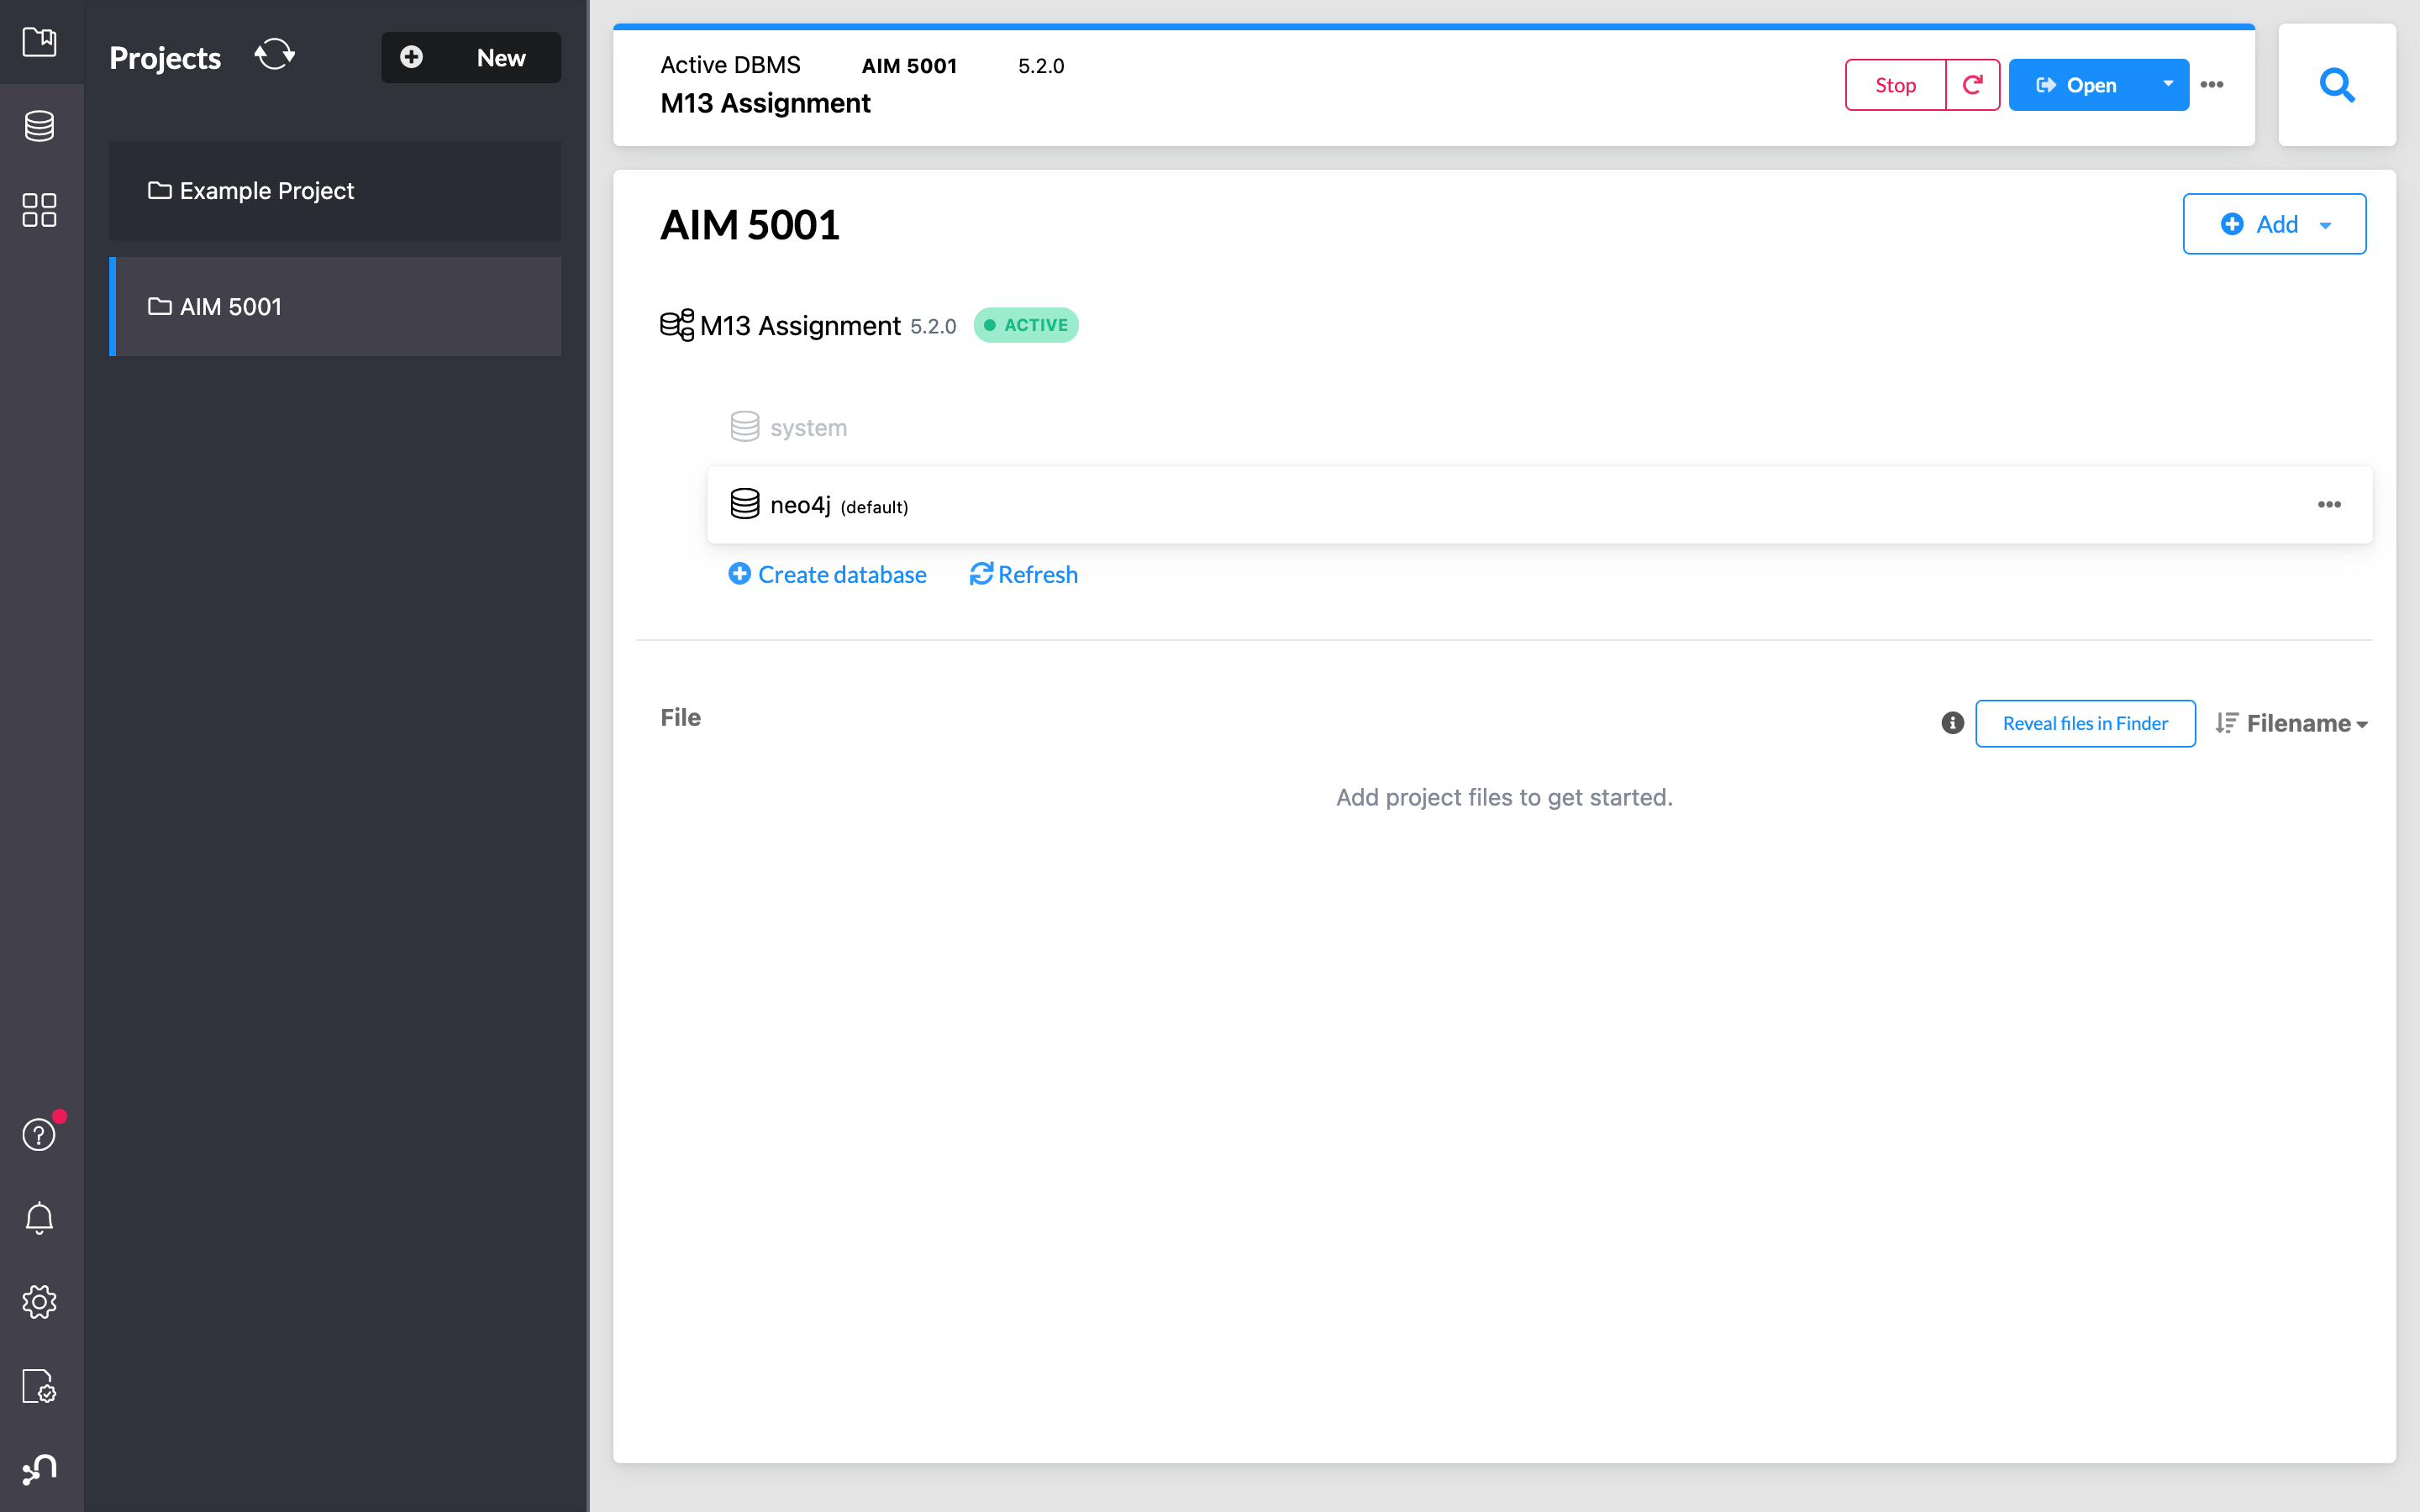

On the next step we activate Neo4j Browser application. 

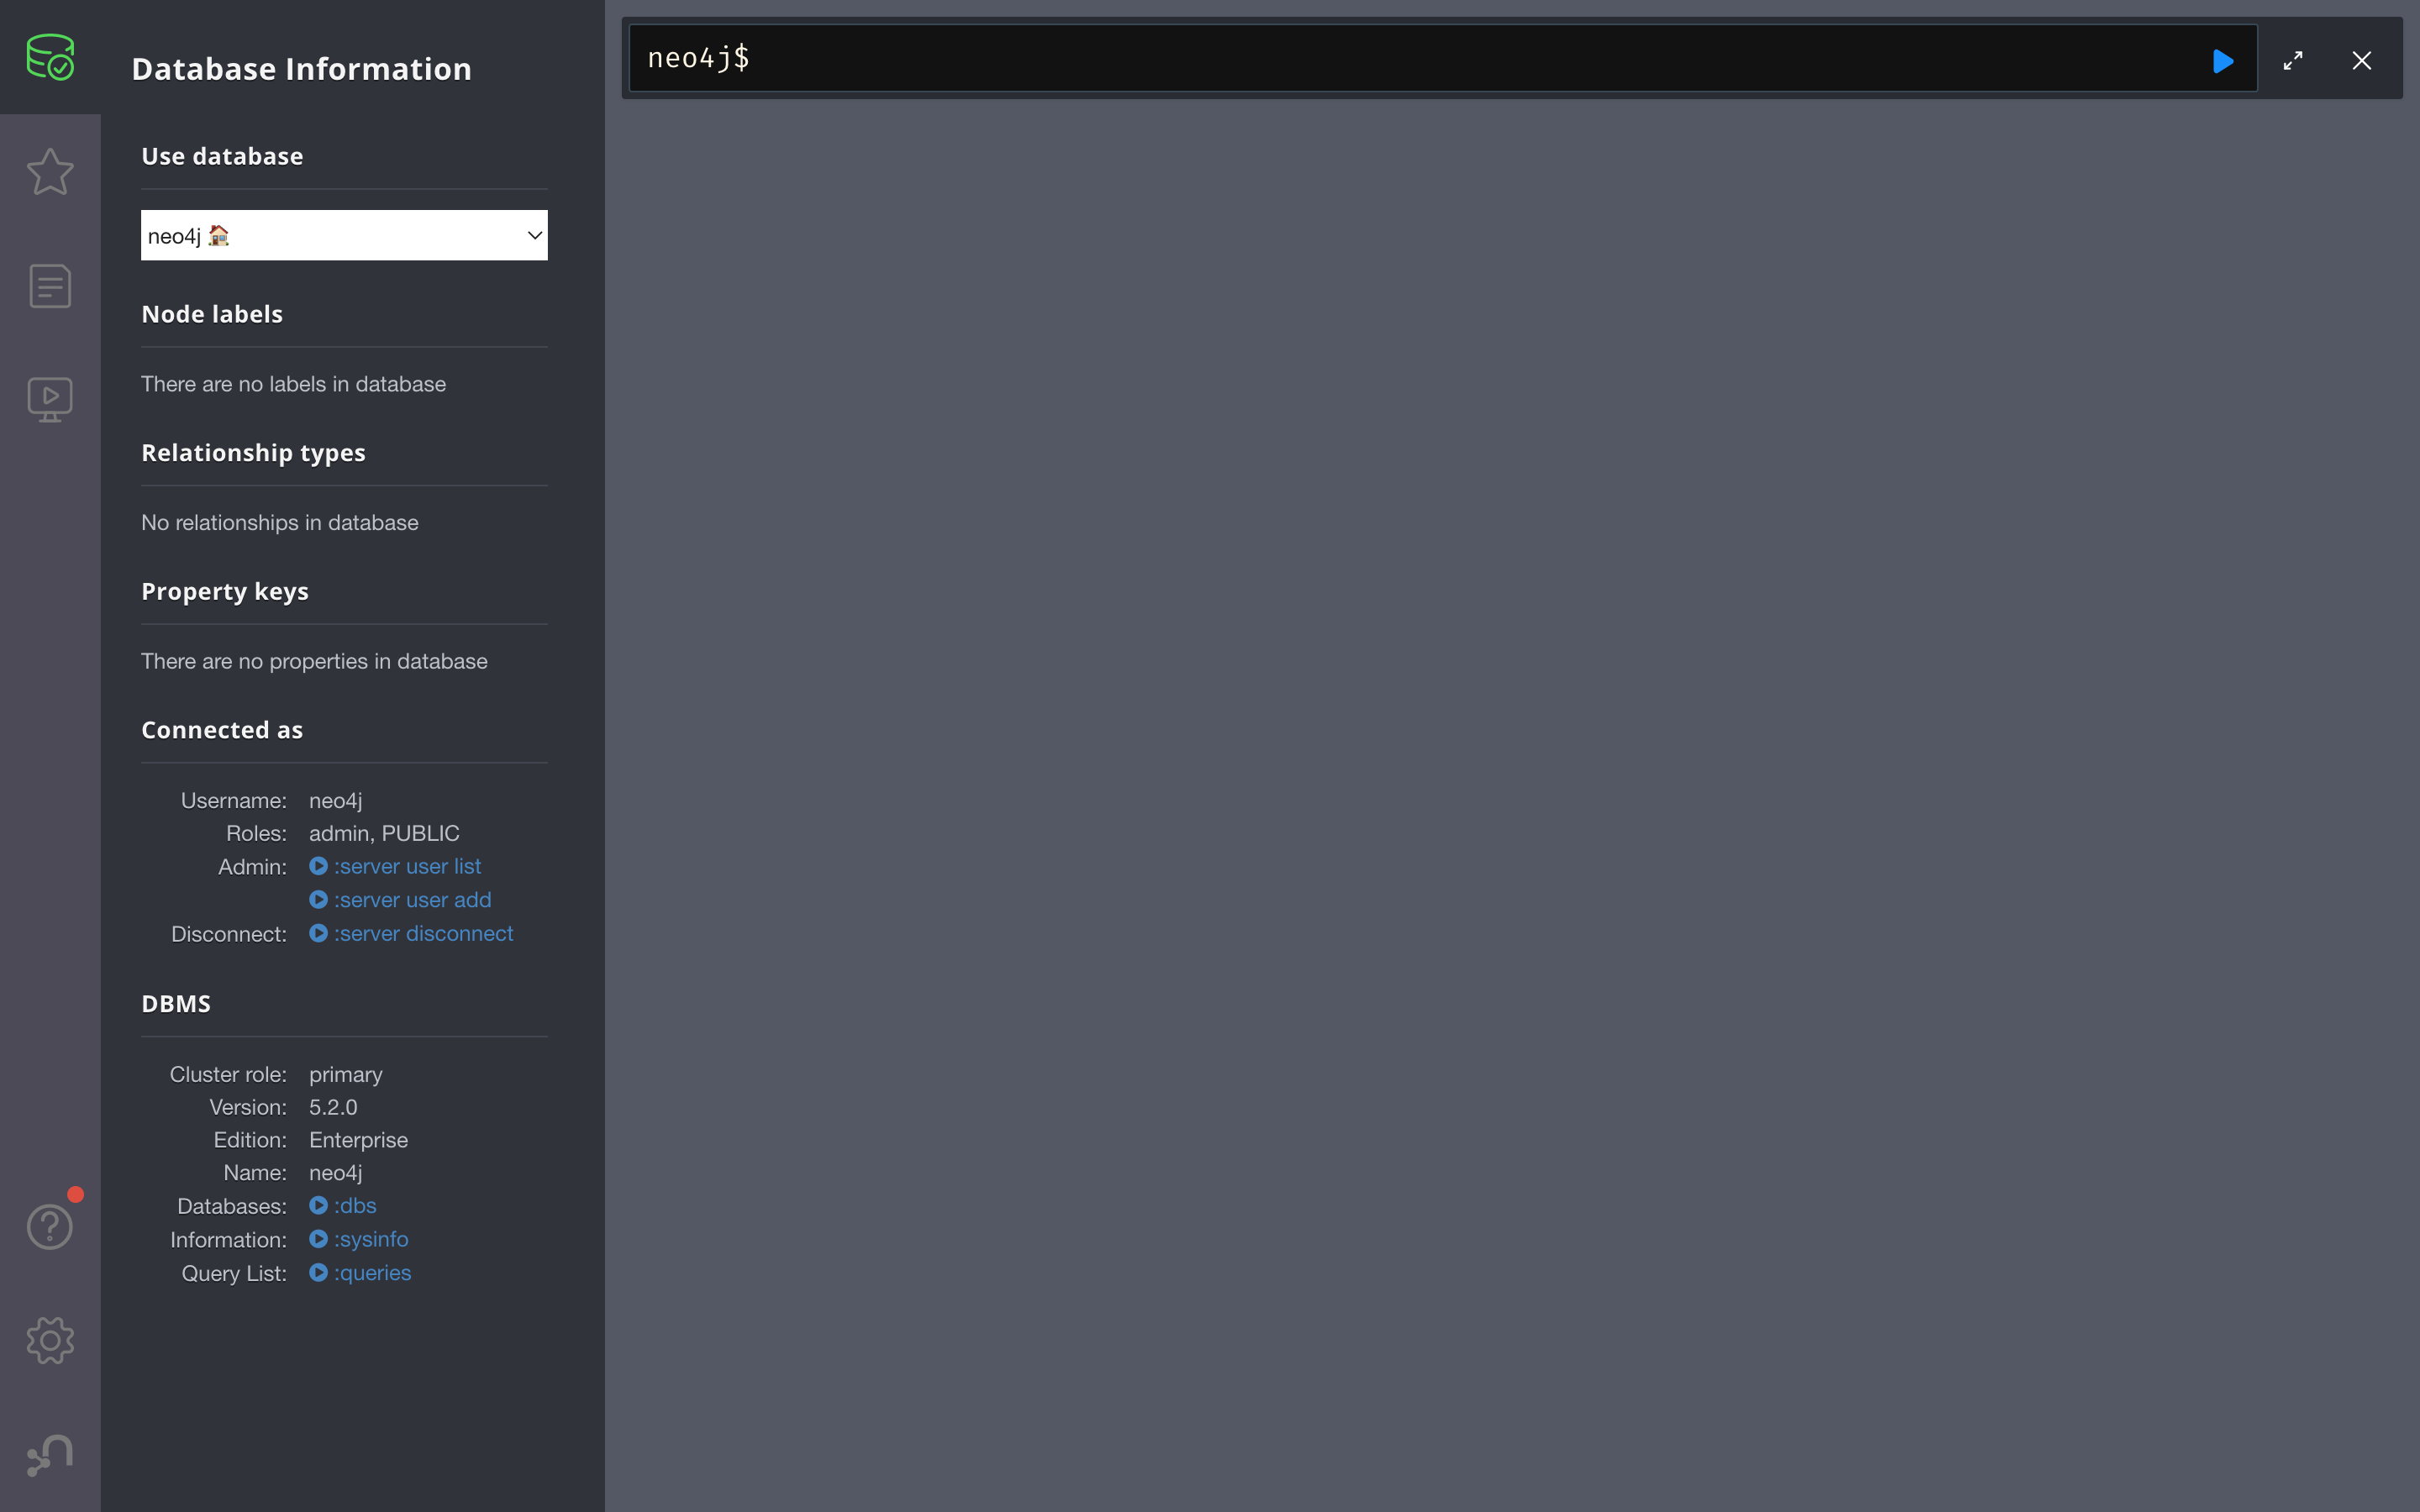

## Loading the extracted CSV files in Neo4j.

QUERY FOR LOAD ARTIST TABLE



```
LOAD CSV WITH HEADERS FROM 'file:///Artist.csv' as line 
CREATE (:Artist {artistId:toInteger(line['ArtistId']),name:line['Name']})
```



QUERY FOR LOAD ALBUM TABLE


```
LOAD CSV WITH HEADERS FROM 'file:///Album.csv' as line 
CREATE (:Album {artistId:toInteger(line['ArtistId']),name:line['Name'],albumId:line['AlbumId']})
```

QUERY FOR LOAD  GENRE TABLE


```
LOAD CSV WITH HEADERS FROM 'file:///Genre.csv' as line 
CREATE (:Genre {genreId:toInteger(line['GenreId']),name:line['Name']})
```



QUERY FOR LOAD  MEDIATYPE TABLE


```
LOAD CSV WITH HEADERS FROM 'file:///MediaType.csv' as line 
CREATE (:MediaType {mediaTypeId:toInteger(line['MediaTypeId']),name:line['Name']})
```


QUERY FOR LOAD TRACK TABLE

```
LOAD CSV WITH HEADERS FROM 'file:///Track.csv' as line 
CREATE (:Track{trackId:line['TrackId'],albumId:line['AlbumId'],mediaTypeId:toInteger(line['MediaTypeId']),
genreId:toInteger(line['GenreId']),composer:line['Composer'],bytes:line['Bytes'],price:line['UnitPrice'],name:line['Name']})
```

## Defining relationships between the nodes.

### Defining relationship 'Composed' between 'Arist'and 'Album' nodes -  describes album and his creator.

```
match (a:Artist), (b:Album)
where a.artistId = b.artistId
create (a) - [r:Composed] -> (b)
return r
```

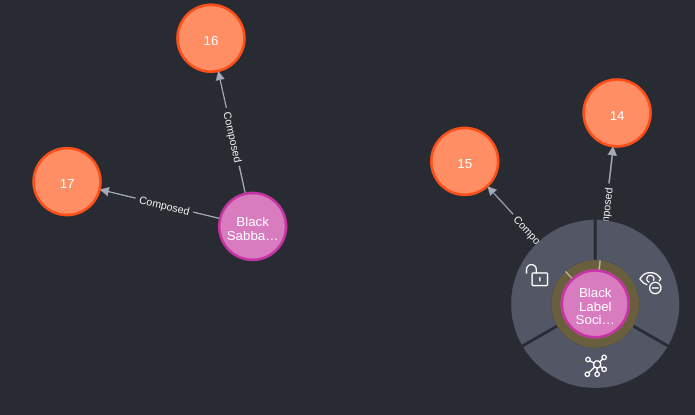

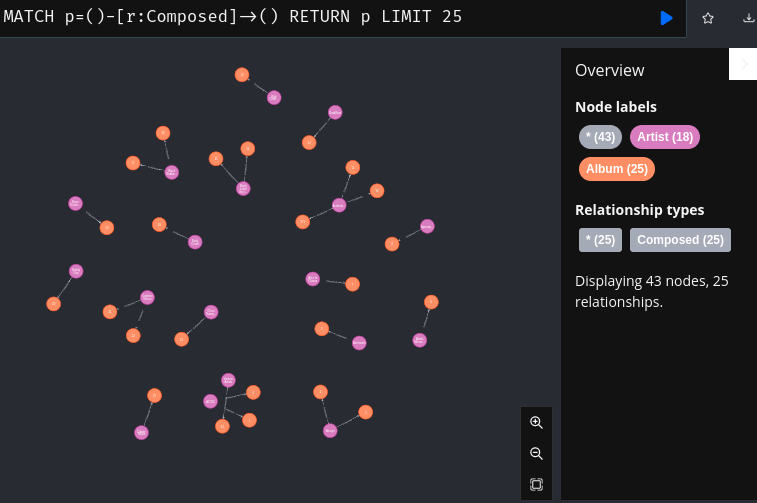

ADDING RELATIONSHIP 'BELONGS TO' BETWEEN NODE TYPES 'Track' and 'Genre' -  describes track and his genre


### Defining relationship 'Belongs to' between 'Track'and 'Genre' nodes -  describes Track belongs to Genre.

```
match (a:Track), (b:Genre)
where a.genreId = b.genreId
create (a) - [r:Belongs_to] -> (b)
return r
```

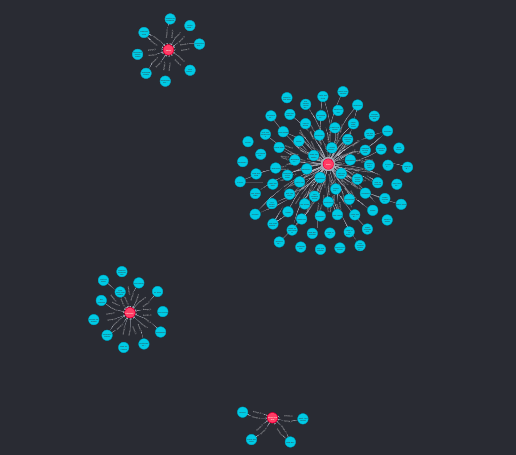

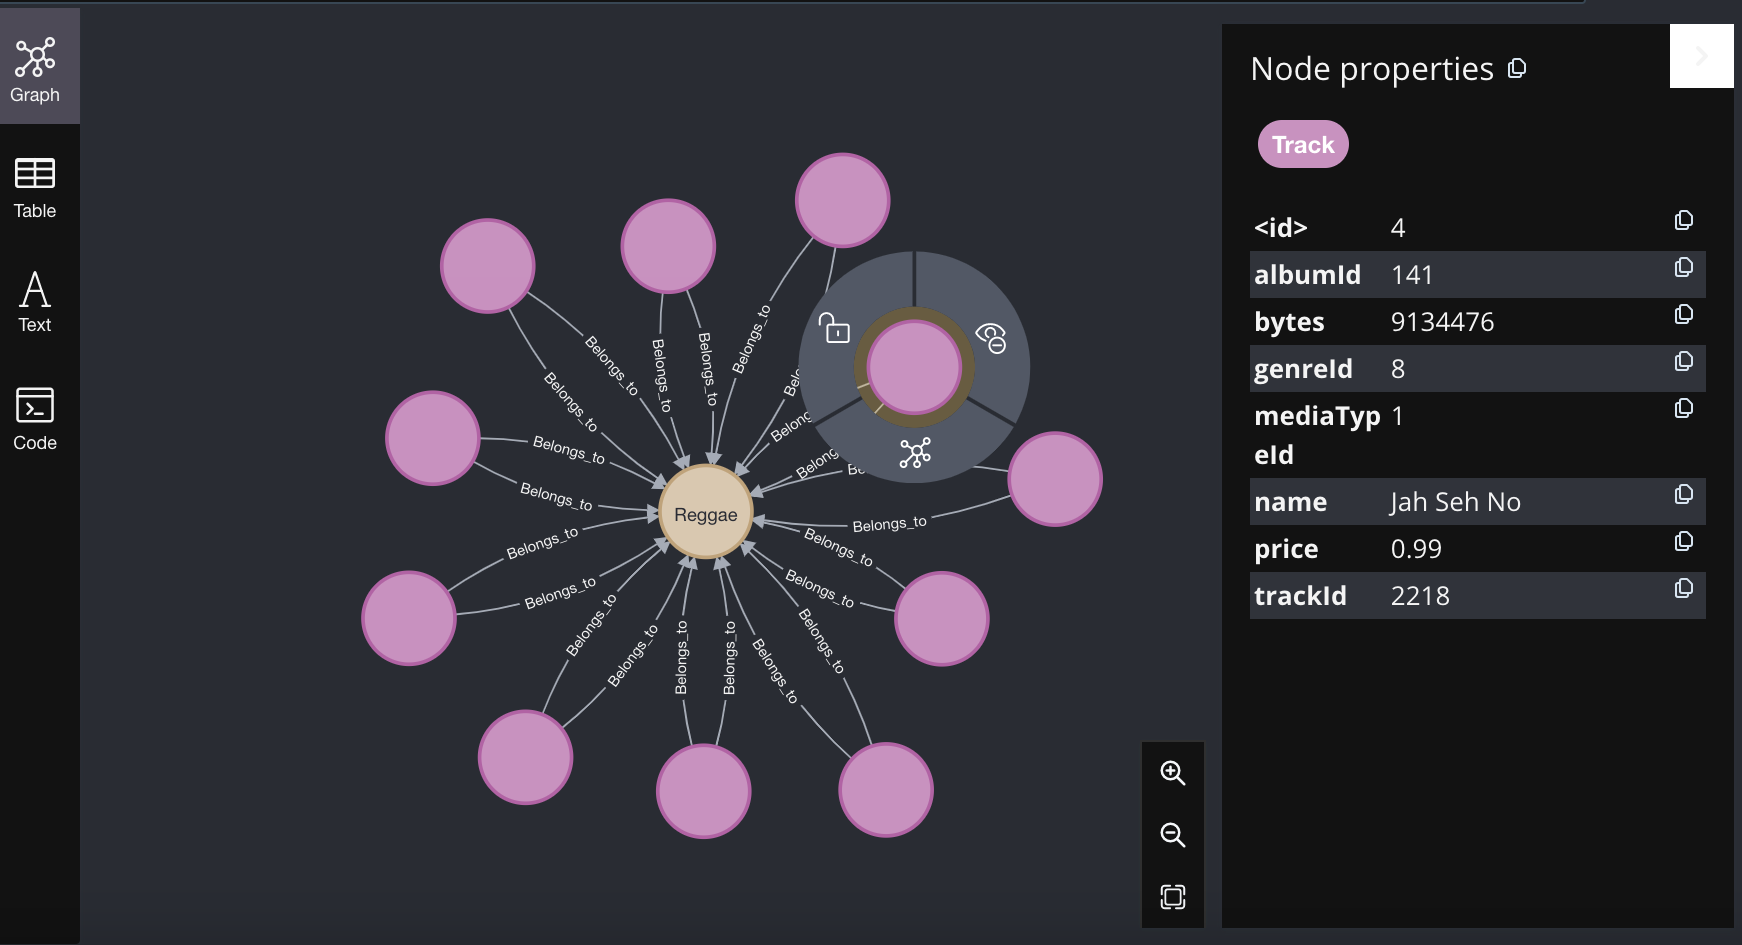


ADDING RELATIONSHIP 'ENCODED_AS' BETWEEN NODE TYPES 'Track' and 'MediaType' -  describes track and his mediatype


### Defining relationship 'Encoded as' between 'Track'and 'MediaType' nodes -  describes a Track has related type of encoding format.
```
match (a:Track), (b:MediaType)
where a.mediaTypeId = b.mediaTypeId
create (a) - [r:Coded_as] -> (b)
return r
```

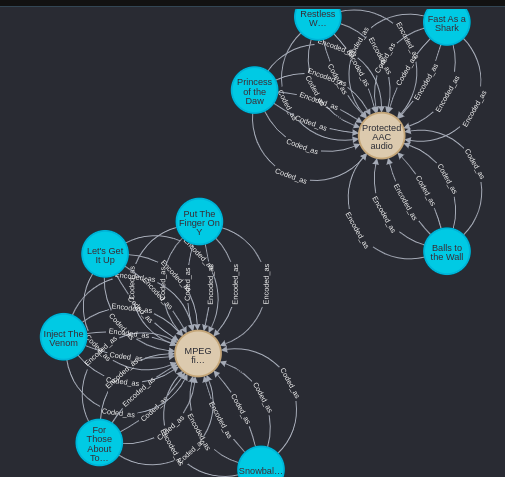

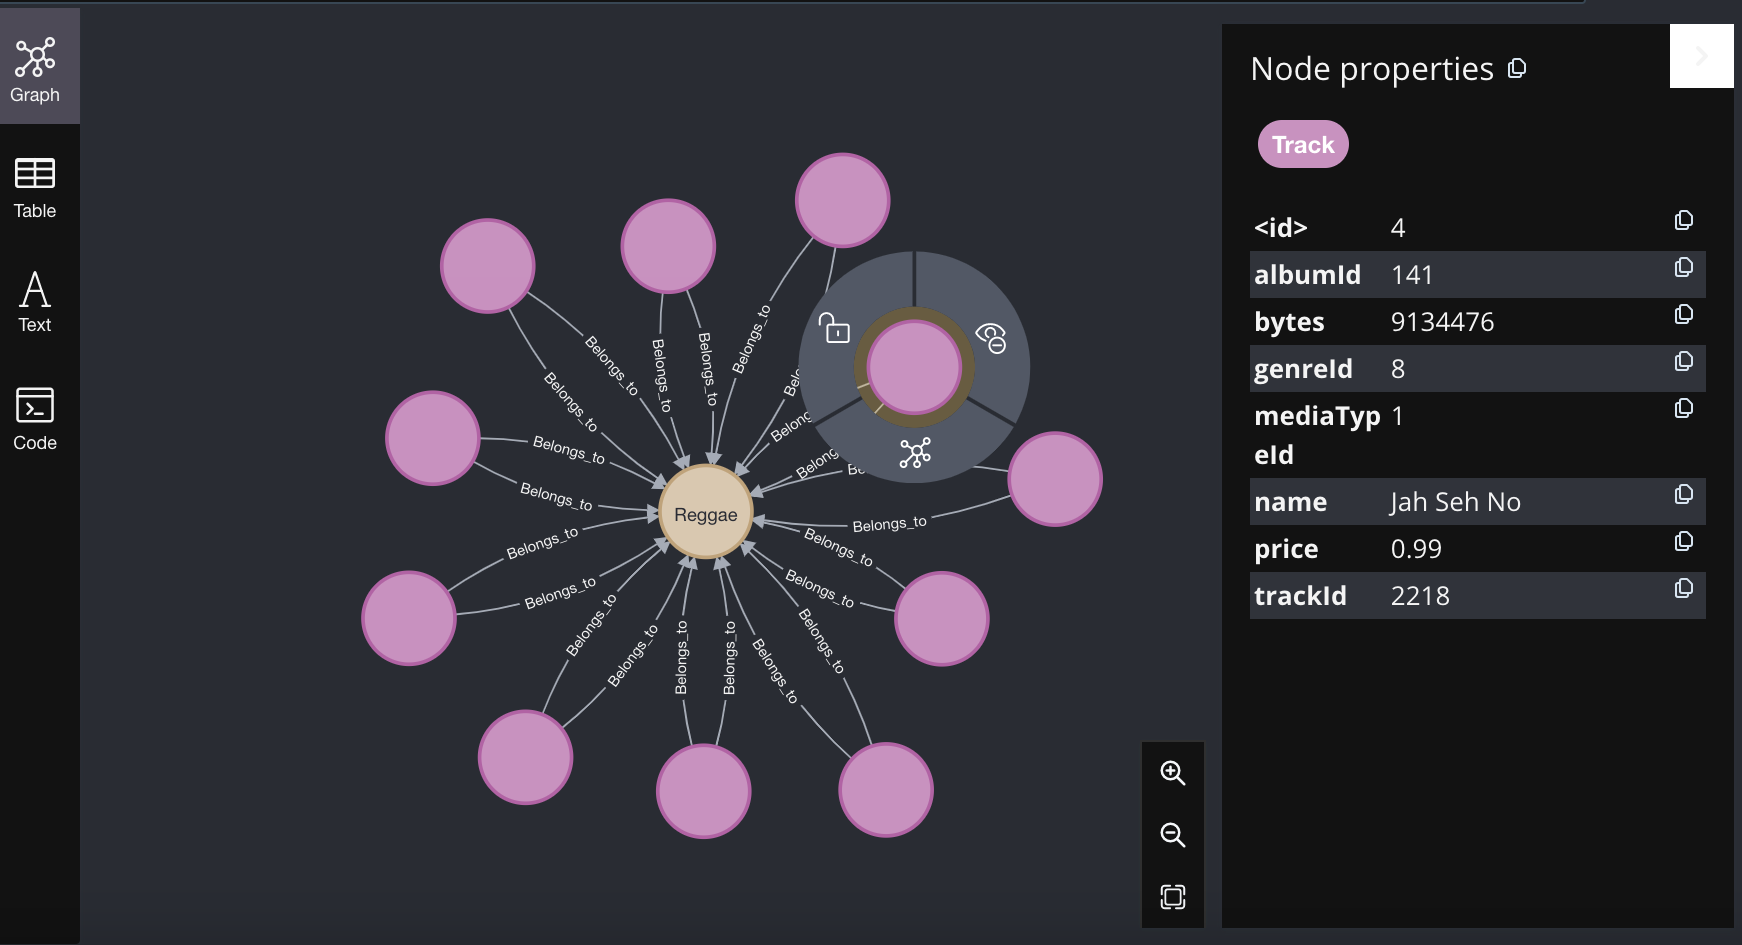

ADDING RELATIONSHIP 'CONTAINS' BETWEEN NODE TYPES 'ALBUM' and 'TRACK' -  describes album and his tracks


### Defining relationship 'Contains' between 'Album'and 'Track' nodes -  describes an Album contains these Tracks.


```
MATCH (track:Track)
MERGE (album:Album {albumId:track.albumId})
MERGE (album)-[r:CONTAINS]->(track)
```



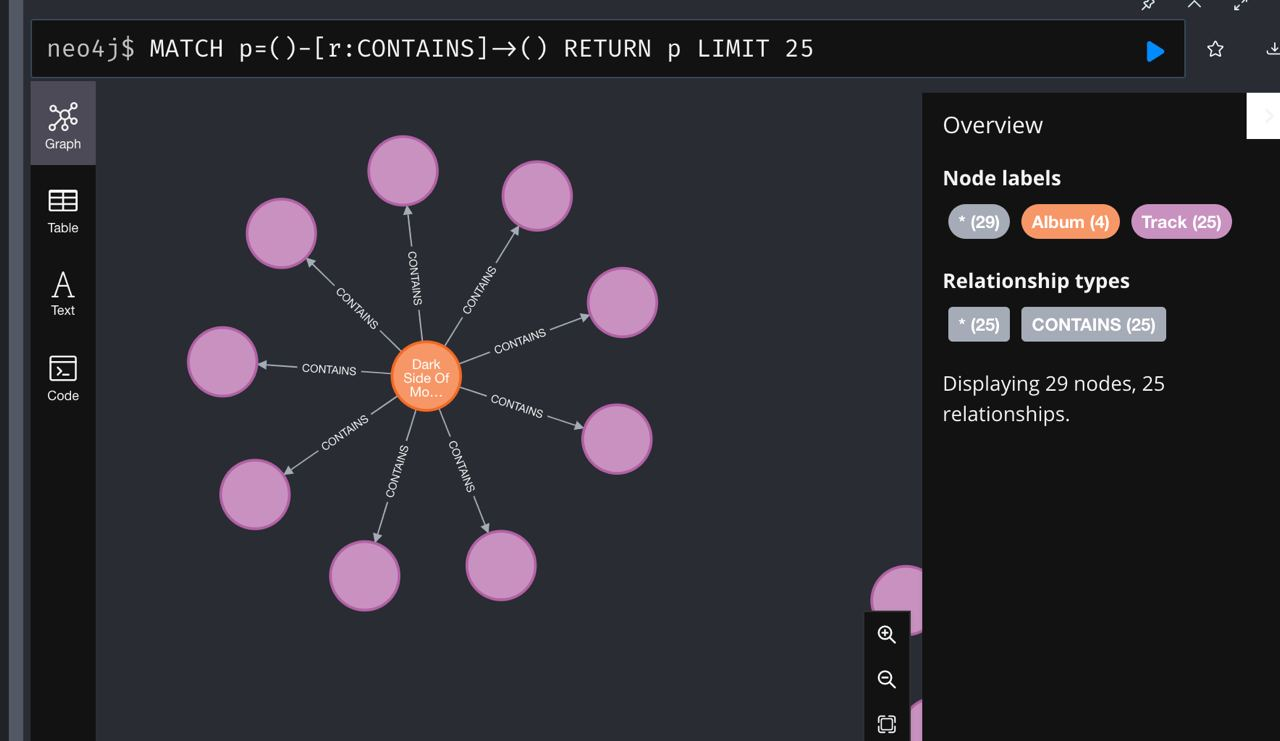

## Question 3

### a) Write and execute a Cypher query that returns all Tracks from the ‘Jazz’ genre composed by ‘Miles Davis’ 

```
match (a:Genre) -- (b:Track)
where a.name = "Jazz" and b.composer = "Miles Davis"
return b.name
```

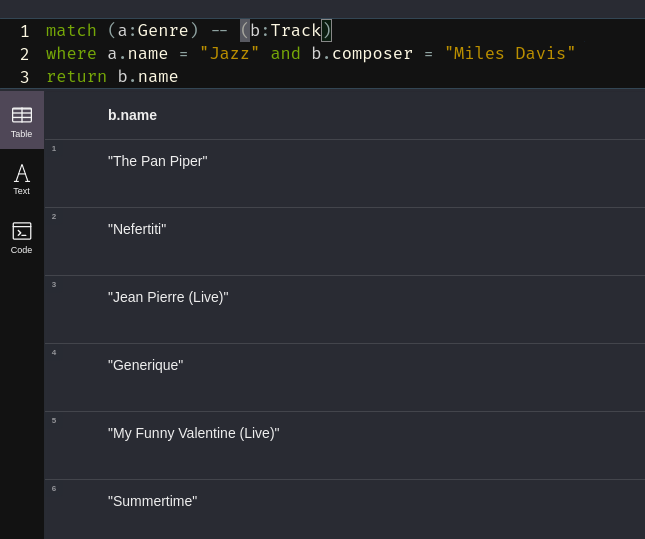

#### Output:
"E.S.P."
"Compulsion"
"Jeru"
"Walkin'"
"Bye Bye Blackbird"
"'Round Midnight"
"Someday My Prince Will Come"
"Black Satin"
"Little Church (Live)"
"Petits Machins (Little Stuff)"
"Miles Runs The Voodoo Down"
"So What"
"Time After Time"
"Tempus Fugit"
"Now's The Time"
"Portia"
"Compulsion"
"Nefertiti"
"Walkin'"
"Bye Bye Blackbird"
"Black Satin"
"New Rhumba"
"Petits Machins (Little Stuff)"
"Tempus Fugit"
"Jeru"
"'Round Midnight"
"E.S.P."
"The Pan Piper"
"Generique"
"My Funny Valentine (Live)"
"Jean Pierre (Live)"
"Time After Time"
"Miles Runs The Voodoo Down"
"Now's The Time"
"Little Church (Live)"
"Portia"
"Someday My Prince Will Come"
"Summertime"
"So What"

### b) Write and execute a Cypher query that returns all Artists that have any Tracks available in the ‘AAC audio file’ media type. 

```
match  (a:Artist)--(d:Album)--(b:Track) -- (c:MediaType)
where c.name = "AAC audio file"
return a.name
```

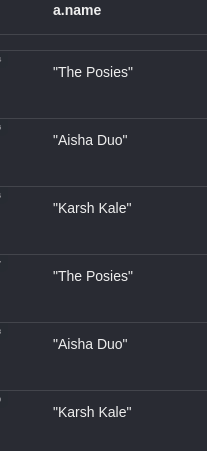

**Output**:
"Luciana Souza/Romero Lubambo"
"Nicolaus Esterhazy Sinfonia"
"Aaron Goldberg"
"The Posies"
"Aisha Duo"
"Karsh Kale"
"The Posies"
"Aisha Duo"
"Karsh Kale"

## c) Write and execute a Cypher query that returns the Artist associated with the album ‘Bongo Fury’. 

```
match (a:Artist) -- (b:Album)
where b.title = "Bongo Fury"
return a.name
```

##### **Output**: "Frank Zappa & Captain Beefheart".


### d) Write and execute a Cypher query that returns all Tracks from the album ‘Coda’ by the artist ‘Led Zeppelin’. 

```
match (c:Artist) -- (a:Album) -- (b:Track)
where a.name = "Coda" and c.name = "Led Zeppelin"
return b.name
```

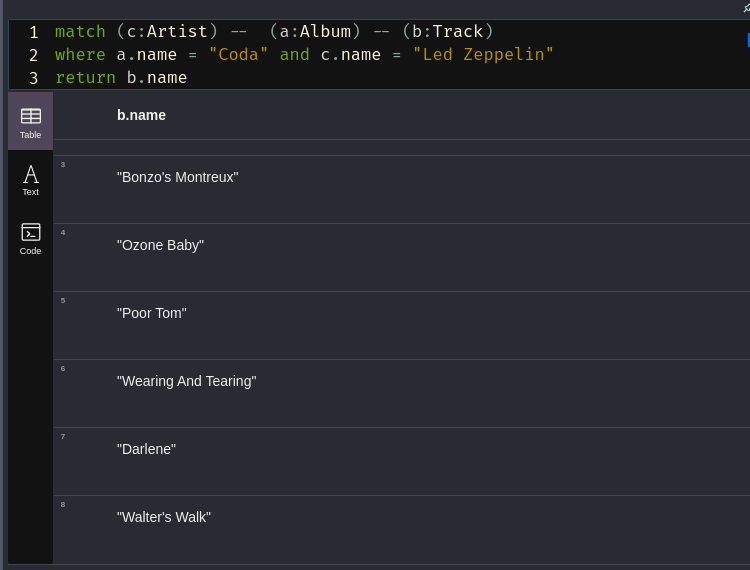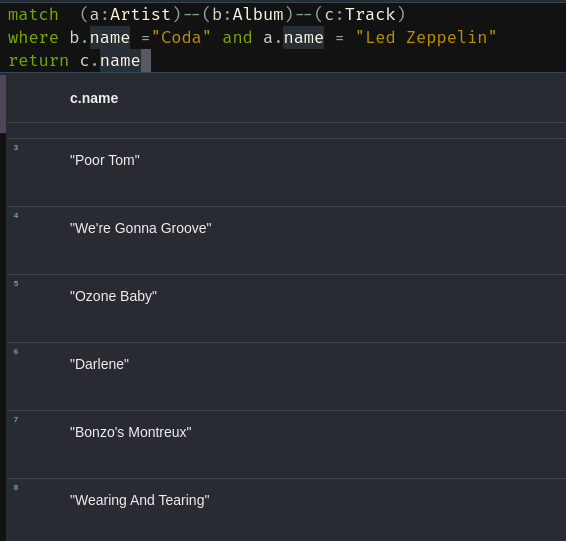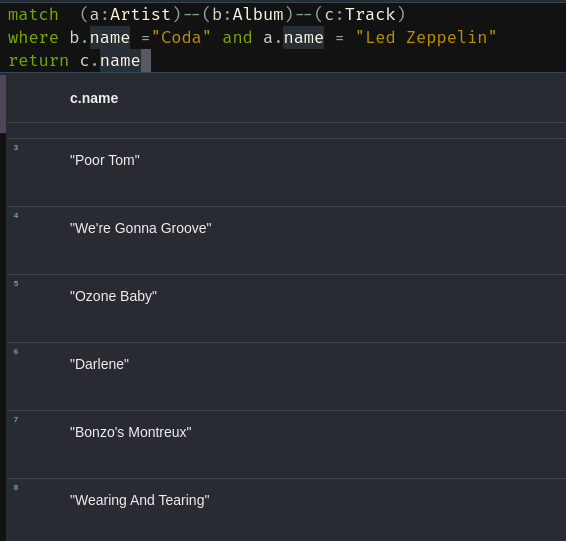

**Output**: 
"Walter's Walk"
"I Can't Quit You Baby"
"Poor Tom"
"We're Gonna Groove"
"Ozone Baby"
"Darlene"
"Bonzo's Montreux"
"Wearing And Tearing"

### e) Write and execute a Cypher query that returns all Albums that contain Tracks composed by ‘Alanis Morissette & Glenn Ballard’

```
match (a:Album) -- (b:Track)
where b.composer = "Alanis Morissette & Glenn Ballard"
return a.name
```

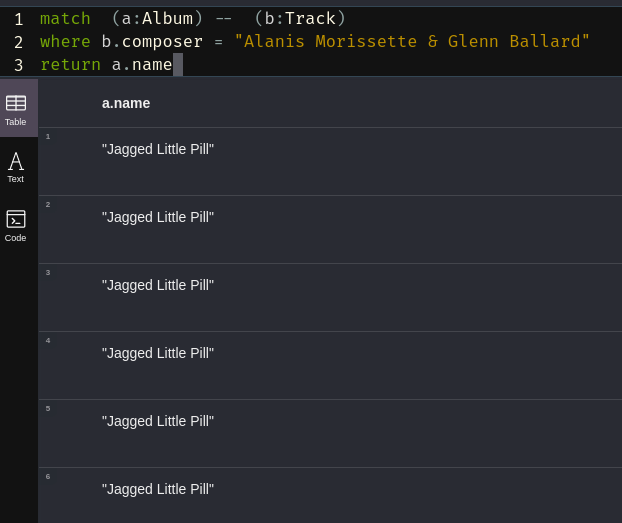

### f) Write and execute a Cypher query that returns the names of all Albums containing Tracks for which no Composer has been specified. 

```
match  (a:Album)- [:CONTAINS] ->(b:Track)
where b.composer is null
return a.name
```

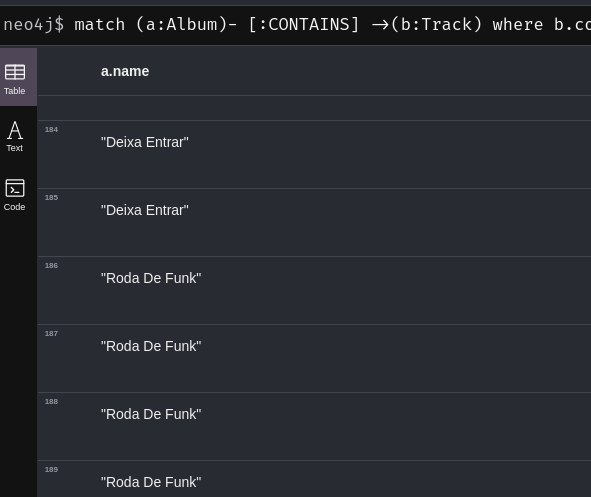

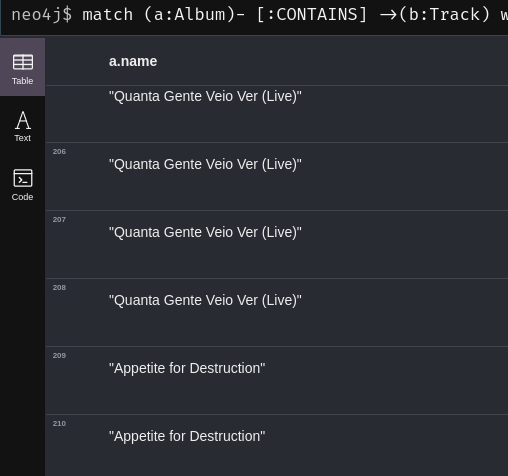

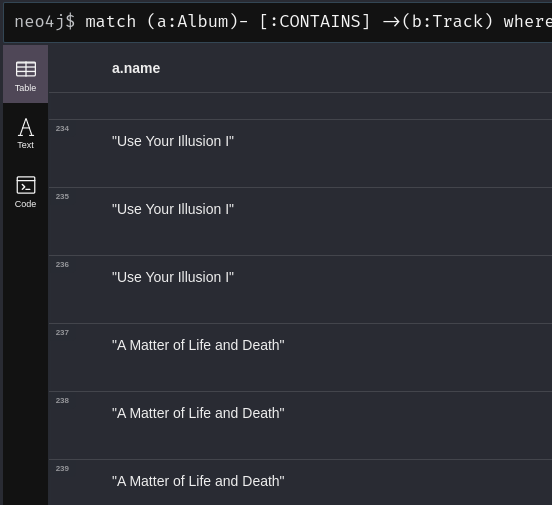